# Capstone Project: The Battle of Neighborhoods

### where to open a chinese restraunt?
__yang Cao__

### (1) scraping data from zip-codes.com

In [16]:
#this is for extracting HARRIS-County-Data from https://www.zip-codes.com/.
                                                        #yang cao, 6/1/2019.
from bs4 import BeautifulSoup
import time
import requests
import pandas as pd

start_time = time.time()
url = 'https://www.zip-codes.com/'
county ='fort-bend'
#html_data = requests.get('https://www.zip-codes.com/county/tx-harris.asp')
html_data = requests.get('https://www.zip-codes.com/county/tx-'+county+'.asp')

html_content = html_data.content
soup = BeautifulSoup(html_content, 'html.parser')

#locate the table containing "HARRIS County, TX Covers 230 ZIP Codes"
tab_loc = soup.table.tr.find_all('td')[1].find_all('div')[0].find_all('table')[1]

links = []
#read links.
for row in tab_loc.find_all('tr'):
    try:
        links.append(row.a['href'])
    except:
        continue

link_len = len(links)

results_all =[]
for i, link in enumerate(links):
    url_zip = url + link
    print('Running links >>>  ' +str(i+1) +'/'+str(link_len))
    print(url_zip)

    html_zip_data = requests.get(url_zip)

    html_zip_content = html_zip_data.content
    soup = BeautifulSoup(html_zip_content, 'html.parser')

    #record the table titles.
    # titles = []
    # title_loc = soup.table.tr.find_all('td')[1].find_all('div')[0]
    # for title in title_loc.find_all('h2')[0:5]:
    #     titles.append(title.text)

    cols = []
    values = []
    tab_loc = soup.table.tr.find_all('td')[1].find_all('div')[0]
    tables  = tab_loc.find_all('table')

    #read first 3 tables.
    for tab in tables[0:3]:
        for row in tab.find_all('tr'):
            temp = row.text.split(':')
            if(temp[0] != 'City Alias(es) To Avoid Using'): #skip this row, only some zip codes area have.
                cols.append(temp[0])
                values.append(temp[1])

    #read 4th table.
    for tab in tables[3:4]:
        for row in tab.find_all('tr')[1:]:
            temp = row.text.strip().replace('\n',':').split(':')
            cols.append(temp[0]+'(2009)')
            values.append(temp[2])
            cols.append(temp[0]+'(2010)')
            values.append(temp[3])

    results_all.append(values)

result = pd.DataFrame(results_all, columns=cols)
#result.append(values, ignore_index=True)
#result.to_csv('HARRIS-County-Data.csv')
result.to_csv(county +'-County-Data.csv')


end_time = time.time()
elapse_time = round(end_time-start_time, 2)

print('finished. code ran for {} s.'.format(elapse_time))

Running links >>>  1/24
https://www.zip-codes.com//zip-code/77053/zip-code-77053.asp
Running links >>>  2/24
https://www.zip-codes.com//zip-code/77406/zip-code-77406.asp
Running links >>>  3/24
https://www.zip-codes.com//zip-code/77407/zip-code-77407.asp
Running links >>>  4/24
https://www.zip-codes.com//zip-code/77417/zip-code-77417.asp
Running links >>>  5/24
https://www.zip-codes.com//zip-code/77441/zip-code-77441.asp
Running links >>>  6/24
https://www.zip-codes.com//zip-code/77444/zip-code-77444.asp
Running links >>>  7/24
https://www.zip-codes.com//zip-code/77451/zip-code-77451.asp
Running links >>>  8/24
https://www.zip-codes.com//zip-code/77459/zip-code-77459.asp
Running links >>>  9/24
https://www.zip-codes.com//zip-code/77461/zip-code-77461.asp
Running links >>>  10/24
https://www.zip-codes.com//zip-code/77464/zip-code-77464.asp
Running links >>>  11/24
https://www.zip-codes.com//zip-code/77469/zip-code-77469.asp
Running links >>>  12/24
https://www.zip-codes.com//zip-code/77

### (2) process the scraped data, such as remove dollar sign, commas, convert types.

In [17]:
import pandas as pd

def convert_currency(val):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
     - Remove ' years'
    """
    new_val = val.replace(',','').replace('$', '').replace('years','')
    return float(new_val)

county = 'Travis'
csv_file = county +'-County-Data.csv'
#csv_file = 'HARRIS-County-Data.csv'

data = pd.read_csv(csv_file)
data = data.drop(data.columns[0], axis=1)

cols =['Zip Code','Latitude', 'Longitude',
       'Current Population', '2010 Population',
       'Households per ZIP Code', 'Average House Value',
       'Avg. Income Per Household', 'Persons Per Household',
       'White Population', 'Black Population', 'Hispanic Population',
       'Asian Population', 'American Indian Population', 'Hawaiian Population',
       'Other Population', 'Male Population', 'Female Population',
       'Median Age', 'Male Median Age', 'Female Median Age',
       '# Residential Mailboxes', '# Business Mailboxes',
       'Total Delivery Receptacles', 'Number of Businesses']
data_study = data[cols]

#remove '$',',','years' and change data type.
for col in data_study.columns:
    try:
        data_study[col] = data_study[col].apply(convert_currency)
    except:
        continue
    if('Population' in col):
        data_study[col]=data_study[col].astype(int)

#data_study.to_csv('HARRIS-County-Study-Data-with-0-Population.csv')
#print(data_study.shape)

#remove row with zero population.
data_study = data_study[data_study['Current Population'] != 0]
data_study = data_study[data_study['2010 Population'] != 0]
#print(data_study.shape)

#data_study.to_csv('HARRIS-County-Study-Data.csv')
data_study.to_csv(county+'-County-Study-Data.csv')
print('finished and %s saved.'%(county+'-County-Study-Data.csv'))

c:\users\yang cao\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\yang cao\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished and Travis-County-Study-Data.csv saved.


### (3) data inspection.

In [18]:
import pandas as pd
harris_data = pd.read_csv('HARRIS-County-Study-Data.csv')
harris_data = harris_data.drop(harris_data.columns[0],axis=1)
harris_data.head()

,Zip Code,Latitude,Longitude,Current Population,2010 Population,Households per ZIP Code,Average House Value,Avg. Income Per Household,Persons Per Household,White Population,...,Other Population,Male Population,Female Population,Median Age,Male Median Age,Female Median Age,# Residential Mailboxes,# Business Mailboxes,Total Delivery Receptacles,Number of Businesses
0,77002,29.750209,-95.367693,9099,16793,3080.0,233000.0,72306.0,1.31,8842,...,1001,13839,2954,33.4,33.5,32.9,6946.0,3410.0,10209.0,2708
1,77003,29.748829,-95.343842,13997,10508,3894.0,272800.0,59575.0,2.41,5494,...,2111,5709,4799,31.8,33.0,30.6,5808.0,760.0,7003.0,398
2,77004,29.727170,-95.361846,34014,32692,12802.0,247300.0,48592.0,2.02,9752,...,1814,16368,16324,29.4,29.8,29.1,16839.0,1264.0,20051.0,725
3,77005,29.717416,-95.418732,25502,25528,9548.0,940800.0,180758.0,2.43,21639,...,394,12528,13000,38.7,38.0,39.3,10495.0,1018.0,13659.0,1014
4,77006,29.739568,-95.388252,24930,19664,11809.0,430600.0,82878.0,1.62,16389,...,1285,11111,8553,35.5,37.0,33.6,15389.0,1145.0,16673.0,1028


In [19]:
#show the shape of data.
harris_data.shape

(131, 25)

__Create a map of Harris County with zip codes superimposed on top__

In [20]:
import folium # map rendering library

lat_harris = 29.7605059
lon_harris = -95.3588269

map_harris = folium.Map(location=[lat_harris, lon_harris], zoom_start=10)

# add markers to map
for lat, lng, zip_code in zip(harris_data['Latitude'], harris_data['Longitude'], harris_data['Zip Code']):
    label = 'zip-{}, Harris, TX'.format(zip_code)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_harris)

map_harris

In [21]:
CLIENT_ID = '3WNK3M0ZLXUIZKK5HGQGNOWJGNOYYJRVSOZ2DXWICIL3EECH' # your Foursquare ID
CLIENT_SECRET = 'A550XJTHWQQ5EF24ICUQFCURJQKNGE4F3T0DCTC2XEOXCKP0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3WNK3M0ZLXUIZKK5HGQGNOWJGNOYYJRVSOZ2DXWICIL3EECH
CLIENT_SECRET:A550XJTHWQQ5EF24ICUQFCURJQKNGE4F3T0DCTC2XEOXCKP0


Let us explore the neighbourhoods corresponding to the first zip in harris_data.

In [22]:
zip_latitude = harris_data.loc[0, 'Latitude'] # neighborhood latitude value
zip_longitude = harris_data.loc[0, 'Longitude'] # neighborhood longitude value

zip_code = harris_data.loc[0, 'Zip Code'] # neighborhood name

print('Latitude and longitude values of {} Harris, TX are {}, {}.'.format(zip_code, 
                                                               zip_latitude, 
                                                               zip_longitude))

Latitude and longitude values of 77002 Harris, TX are 29.750209, -95.367693.


search the top 100 venues that in zip 77002 within a radius of 500 meters.

In [23]:
search_query = 'venues'
radius = 500
LIMIT = 100
# type your answer here
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, zip_latitude, zip_longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=3WNK3M0ZLXUIZKK5HGQGNOWJGNOYYJRVSOZ2DXWICIL3EECH&client_secret=A550XJTHWQQ5EF24ICUQFCURJQKNGE4F3T0DCTC2XEOXCKP0&ll=29.750209,-95.367693&v=20180605&radius=500&limit=100'

In [24]:
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

results = requests.get(url).json()
results
with open('results.json', 'w') as fp:
    json.dump(results, fp)

Borrow the __get_category_type__ function from the Foursquare lab.

In [25]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Clean the json and structure it into a pandas dataframe.

In [26]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Your Pie,Pizza Place,29.751770,-95.368600
1,Savarese Fight Fit Boxing Gym,Gym,29.750333,-95.365737
2,Tellepsen Family Downtown YMCA,Gym,29.752068,-95.370679
3,Pappas Bar-B-Q,BBQ Joint,29.748271,-95.368506
4,Louisiana Famous Fried Chicken,Fried Chicken Joint,29.748419,-95.370210


In [27]:
nearby_venues.shape

(27, 4)

In [28]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

27 venues were returned by Foursquare.


Explore neighbourhoods in Harris, TX.

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Run the above function on each zip code and create a new dataframe called harris_venues.

In [30]:
harris_venues = getNearbyVenues(names=harris_data['Zip Code'],
                                   latitudes=harris_data['Latitude'],
                                   longitudes=harris_data['Longitude']
                                  )


77002
77003
77004
77005
77006
77007
77008
77009
77010
77011
77012
77013
77014
77015
77016
77017
77018
77019
77020
77021
77022
77023
77024
77025
77026
77027
77028
77029
77030
77031
77032
77033
77034
77035
77036
77037
77038
77039
77040
77041
77042
77043
77044
77045
77046
77047
77048
77049
77050
77051
77054
77055
77056
77057
77058
77059
77060
77061
77062
77063
77064
77065
77066
77067
77068
77069
77070
77071
77072
77073
77074
77075
77076
77077
77078
77079
77080
77081
77082
77083
77084
77085
77086
77087
77088
77089
77090
77091
77092
77093
77094
77095
77096
77098
77099
77336
77338
77339
77345
77346
77373
77375
77377
77379
77388
77389
77396
77401
77429
77433
77447
77449
77450
77484
77493
77502
77503
77504
77505
77506
77520
77521
77530
77532
77536
77547
77562
77571
77586
77587
77598


check the size of the resulting dataframe.

In [31]:
harris_venues = harris_venues.rename(index=str, columns={"Neighborhood": "Zip Code", "Neighborhood Latitude":"Latitude",
                                                        "Neighborhood Longitude": "Longitude"})
print(harris_venues.shape)
harris_venues.head()

(1062, 7)


,Zip Code,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,77002,29.750209,-95.367693,Your Pie,29.751770,-95.368600,Pizza Place
1,77002,29.750209,-95.367693,Savarese Fight Fit Boxing Gym,29.750333,-95.365737,Gym
2,77002,29.750209,-95.367693,Tellepsen Family Downtown YMCA,29.752068,-95.370679,Gym
3,77002,29.750209,-95.367693,Pappas Bar-B-Q,29.748271,-95.368506,BBQ Joint
4,77002,29.750209,-95.367693,Louisiana Famous Fried Chicken,29.748419,-95.370210,Fried Chicken Joint


In [32]:
harris_venues.groupby('Zip Code').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Zip Code,,,,,,
77002,27,27,27,27,27,27
77003,7,7,7,7,7,7
77004,6,6,6,6,6,6
77005,68,68,68,68,68,68
77006,11,11,11,11,11,11
77007,61,61,61,61,61,61
77008,5,5,5,5,5,5
77009,11,11,11,11,11,11
77010,71,71,71,71,71,71


find out how many unique categories can be curated from all the returned venues.

In [33]:
print('There are {} uniques categories.'.format(len(harris_venues['Venue Category'].unique())))

There are 223 uniques categories.


In [34]:
# one hot encoding
harris_onehot = pd.get_dummies(harris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
harris_onehot['Zip Code'] = harris_venues['Zip Code'] 

# move neighborhood column to the first column
fixed_columns = [harris_onehot.columns[-1]] + list(harris_onehot.columns[:-1])
harris_onehot = harris_onehot[fixed_columns]

harris_onehot.head()

,Zip Code,ATM,Accessories Store,Advertising Agency,African Restaurant,Airport Terminal,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,77002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,77002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,77002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,77002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,77002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
harris_onehot.shape

(1062, 224)

group rows by zip code and by taking the mean of the frequency of occurrence of each category

In [36]:
harris_grouped = harris_onehot.groupby('Zip Code').mean().reset_index()
harris_grouped.head()

,Zip Code,ATM,Accessories Store,Advertising Agency,African Restaurant,Airport Terminal,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,77002,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,77003,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,77004,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,77005,0.0,0.0,0.0,0.0,0.0,0.029412,0.0,0.0,0.014706,...,0.014706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,77006,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's print each neighborhood along with the top 5 most common venues

In [37]:
num_top_venues = 5

for hood in harris_grouped['Zip Code']:
    print("----"+str(hood)+"----")
    temp = harris_grouped[harris_grouped['Zip Code'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----77002----
                  venue  freq
0   Rental Car Location  0.11
1  Gym / Fitness Center  0.07
2                   Gym  0.07
3           Coffee Shop  0.07
4             Rock Club  0.04


----77003----
                  venue  freq
0  Gym / Fitness Center  0.29
1    Light Rail Station  0.14
2   American Restaurant  0.14
3           Film Studio  0.14
4                  Park  0.14


----77004----
                       venue  freq
0               Burger Joint  0.17
1  Cajun / Creole Restaurant  0.17
2                       Park  0.17
3                 Laundromat  0.17
4                     Lawyer  0.17


----77005----
                venue  freq
0         Coffee Shop  0.06
1      Cosmetics Shop  0.06
2  Italian Restaurant  0.06
3                 Spa  0.04
4            Boutique  0.04


----77006----
               venue  freq
0        Coffee Shop  0.18
1               Café  0.09
2             Hostel  0.09
3  Health Food Store  0.09
4     Cosmetics Shop  0.09


----77007----
      

                 venue  freq
0  Fried Chicken Joint  0.25
1    Mobile Phone Shop  0.12
2          Pizza Place  0.12
3           Food Truck  0.12
4       Discount Store  0.12


----77061----
                 venue  freq
0  Rental Car Location   0.6
1     Airport Terminal   0.2
2   Mexican Restaurant   0.2
3        Indie Theater   0.0
4    Mobile Phone Shop   0.0


----77062----
                  venue  freq
0           Music Store  0.25
1           Golf Course  0.25
2  Fast Food Restaurant  0.25
3                 Trail  0.25
4                   ATM  0.00


----77063----
                    venue  freq
0     Rental Car Location  0.20
1             Pizza Place  0.10
2        Hunan Restaurant  0.05
3  Thrift / Vintage Store  0.05
4        Ramen Restaurant  0.05


----77064----
                    venue  freq
0                   Hotel  0.12
1     American Restaurant  0.12
2             Gas Station  0.06
3  Furniture / Home Store  0.06
4     Fried Chicken Joint  0.06


----77065----
        

                        venue  freq
0           Electronics Store   0.5
1  Construction & Landscaping   0.5
2       Outdoors & Recreation   0.0
3               Moving Target   0.0
4                   Multiplex   0.0


----77396----
                       venue  freq
0              Moving Target   0.5
1                        Gym   0.5
2                        ATM   0.0
3  Middle Eastern Restaurant   0.0
4                      Motel   0.0


----77401----
            venue  freq
0   Grocery Store  0.09
1            Bank  0.09
2  Sandwich Place  0.09
3            Park  0.05
4        Pharmacy  0.05


----77429----
               venue  freq
0       Intersection  0.18
1  Martial Arts Dojo  0.09
2         Playground  0.09
3        Pizza Place  0.09
4                Spa  0.09


----77433----
                        venue  freq
0  Tourist Information Center   0.5
1                   Multiplex   0.5
2   Middle Eastern Restaurant   0.0
3                       Motel   0.0
4               Moving T

write a function to sort the venues in descending order.

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

create the new dataframe and display the top 10 venues for each neighborhood.

In [39]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Zip Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Zip Code'] = harris_grouped['Zip Code']

for ind in np.arange(harris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(harris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,77002,Rental Car Location,Coffee Shop,Gym / Fitness Center,Gym,Spanish Restaurant,Thai Restaurant,Fast Food Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Bike Rental / Bike Share
1,77003,Gym / Fitness Center,Brewery,American Restaurant,Film Studio,Park,Light Rail Station,Yoga Studio,Electronics Store,Food & Drink Shop,Food
2,77004,Laundromat,Burger Joint,Park,Snack Place,Cajun / Creole Restaurant,Lawyer,Yoga Studio,Food,Flea Market,Film Studio
3,77005,Cosmetics Shop,Italian Restaurant,Coffee Shop,Spa,Boutique,Food Truck,Ice Cream Shop,Burger Joint,Mediterranean Restaurant,Mexican Restaurant
4,77006,Coffee Shop,Cosmetics Shop,Health Food Store,Gym,New American Restaurant,Café,Bar,Pub,Ice Cream Shop,Hostel


#### cluster neighborhoods.

In [40]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

harris_grouped_clustering = harris_grouped.drop('Zip Code', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(harris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 4, 2,
       3, 2, 2, 2, 0, 4, 0, 0, 4, 0, 2, 3, 2, 0, 2, 0, 2, 4, 2, 2, 2, 2,
       2, 4, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 4, 2, 0, 3,
       2, 2])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [41]:
#add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [42]:
harris_merged = harris_data
#merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
harris_merged = harris_merged.join(neighborhoods_venues_sorted.set_index('Zip Code'), on='Zip Code')

harris_merged.head() # check the last columns!

,Zip Code,Latitude,Longitude,Current Population,2010 Population,Households per ZIP Code,Average House Value,Avg. Income Per Household,Persons Per Household,White Population,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,77002,29.750209,-95.367693,9099,16793,3080.0,233000.0,72306.0,1.31,8842,...,Rental Car Location,Coffee Shop,Gym / Fitness Center,Gym,Spanish Restaurant,Thai Restaurant,Fast Food Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Bike Rental / Bike Share
1,77003,29.748829,-95.343842,13997,10508,3894.0,272800.0,59575.0,2.41,5494,...,Gym / Fitness Center,Brewery,American Restaurant,Film Studio,Park,Light Rail Station,Yoga Studio,Electronics Store,Food & Drink Shop,Food
2,77004,29.727170,-95.361846,34014,32692,12802.0,247300.0,48592.0,2.02,9752,...,Laundromat,Burger Joint,Park,Snack Place,Cajun / Creole Restaurant,Lawyer,Yoga Studio,Food,Flea Market,Film Studio
3,77005,29.717416,-95.418732,25502,25528,9548.0,940800.0,180758.0,2.43,21639,...,Cosmetics Shop,Italian Restaurant,Coffee Shop,Spa,Boutique,Food Truck,Ice Cream Shop,Burger Joint,Mediterranean Restaurant,Mexican Restaurant
4,77006,29.739568,-95.388252,24930,19664,11809.0,430600.0,82878.0,1.62,16389,...,Coffee Shop,Cosmetics Shop,Health Food Store,Gym,New American Restaurant,Café,Bar,Pub,Ice Cream Shop,Hostel


let's visualize the resulting clusters

In [43]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[lat_harris, lon_harris], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(harris_merged['Latitude'], harris_merged['Longitude'], harris_merged['Zip Code'], harris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    try:
        cluster = int(cluster)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_clusters)
    except:
        continue
       
map_clusters

In [44]:
harris_merged.loc[harris_merged['Cluster Labels'] == 0, harris_merged.columns[[1] + list(range(5, harris_merged.shape[1]))]]

,Latitude,Households per ZIP Code,Average House Value,Avg. Income Per Household,Persons Per Household,White Population,Black Population,Hispanic Population,Asian Population,American Indian Population,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,29.741797,5940.0,85700.0,30665.0,3.25,13078,490,18515,99,301,...,Mexican Restaurant,Fried Chicken Joint,Clothing Store,Bus Station,Snack Place,Gas Station,Food,Seafood Restaurant,Grocery Store,Convenience Store
15,29.682276,9573.0,90300.0,44286.0,3.39,21325,1136,26826,1450,390,...,Grocery Store,Video Store,Discount Store,Outdoors & Recreation,Yoga Studio,Food & Drink Shop,Food,Flea Market,Film Studio,Field
21,29.720960,9129.0,112800.0,37462.0,3.17,18879,815,25402,395,415,...,Office,Mexican Restaurant,Motel,Park,Yoga Studio,Food,Flea Market,Film Studio,Field,Fast Food Restaurant
23,29.679892,12096.0,405900.0,71990.0,2.14,17149,3337,5143,4366,247,...,Mexican Restaurant,Motel,Burger Joint,Gas Station,Coffee Shop,Smoke Shop,Bakery,Video Store,Diner,Mobile Phone Shop
57,29.652842,8312.0,116900.0,39180.0,2.94,11604,5329,15604,1389,277,...,Rental Car Location,Mexican Restaurant,Airport Terminal,Dumpling Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Film Studio,Field
62,29.962562,9611.0,125900.0,61430.0,3.26,13865,7426,13193,4624,369,...,Mexican Restaurant,Pharmacy,Video Store,Baseball Field,Gym / Fitness Center,Yoga Studio,Electronics Store,Food & Drink Shop,Food,Flea Market
71,29.623422,11190.0,125900.0,50653.0,3.34,19153,7441,23962,2692,397,...,Mexican Restaurant,Grocery Store,Ice Cream Shop,Burger Joint,Yoga Studio,Food Court,Food & Drink Shop,Food,Flea Market,Film Studio
80,29.832593,31473.0,142400.0,65617.0,3.02,56980,14294,41052,9593,1201,...,Bakery,Martial Arts Dojo,Mexican Restaurant,Gym,Fast Food Restaurant,Sushi Restaurant,Seafood Restaurant,Latin American Restaurant,Sandwich Place,Bagel Shop
82,29.921804,7758.0,97300.0,43116.0,3.61,12560,7514,16376,2151,407,...,Fast Food Restaurant,Mexican Restaurant,Discount Store,Pawn Shop,Fried Chicken Joint,Gas Station,Automotive Shop,Food Truck,Donut Shop,Pizza Place
83,29.685837,10455.0,89000.0,35302.0,3.45,20042,5496,28897,323,349,...,Seafood Restaurant,Mexican Restaurant,Ice Cream Shop,Bus Station,Dog Run,Bakery,Fast Food Restaurant,Hardware Store,Event Space,Empanada Restaurant


In [45]:
harris_merged.loc[harris_merged['Cluster Labels'] == 1, harris_merged.columns[[1] + list(range(5, harris_merged.shape[1]))]]

,Latitude,Households per ZIP Code,Average House Value,Avg. Income Per Household,Persons Per Household,White Population,Black Population,Hispanic Population,Asian Population,American Indian Population,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,29.797524,5192.0,85500.0,39513.0,3.28,9414,3709,12305,157,506,...,Construction & Landscaping,Yoga Studio,Dumpling Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Film Studio,Field,Fast Food Restaurant
67,29.651065,9362.0,130900.0,49137.0,2.74,7526,13396,6322,2095,268,...,Construction & Landscaping,Yoga Studio,Dumpling Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Film Studio,Field,Fast Food Restaurant
105,30.126472,7039.0,283100.0,115725.0,3.02,18003,1073,4426,693,195,...,Construction & Landscaping,Electronics Store,Yoga Studio,Dumpling Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Film Studio,Field


In [46]:
harris_merged.loc[harris_merged['Cluster Labels'] == 2, harris_merged.columns[[1] + list(range(5, harris_merged.shape[1]))]]

,Latitude,Households per ZIP Code,Average House Value,Avg. Income Per Household,Persons Per Household,White Population,Black Population,Hispanic Population,Asian Population,American Indian Population,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,29.750209,3080.0,233000.0,72306.0,1.31,8842,6687,3248,366,82,...,Rental Car Location,Coffee Shop,Gym / Fitness Center,Gym,Spanish Restaurant,Thai Restaurant,Fast Food Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Bike Rental / Bike Share
1,29.748829,3894.0,272800.0,59575.0,2.41,5494,2848,5427,330,101,...,Gym / Fitness Center,Brewery,American Restaurant,Film Studio,Park,Light Rail Station,Yoga Studio,Electronics Store,Food & Drink Shop,Food
2,29.727170,12802.0,247300.0,48592.0,2.02,9752,19332,4079,2318,265,...,Laundromat,Burger Joint,Park,Snack Place,Cajun / Creole Restaurant,Lawyer,Yoga Studio,Food,Flea Market,Film Studio
3,29.717416,9548.0,940800.0,180758.0,2.43,21639,513,2025,3403,137,...,Cosmetics Shop,Italian Restaurant,Coffee Shop,Spa,Boutique,Food Truck,Ice Cream Shop,Burger Joint,Mediterranean Restaurant,Mexican Restaurant
4,29.739568,11809.0,430600.0,82878.0,1.62,16389,958,3573,1358,221,...,Coffee Shop,Cosmetics Shop,Health Food Store,Gym,New American Restaurant,Café,Bar,Pub,Ice Cream Shop,Hostel
5,29.770418,16083.0,398200.0,121458.0,1.90,24213,1888,9284,2227,310,...,Bar,Nightclub,Mexican Restaurant,American Restaurant,Southern / Soul Food Restaurant,Spa,Athletics & Sports,Lounge,Taco Place,Sushi Restaurant
6,29.798349,14878.0,396300.0,97690.0,2.04,24631,1617,9672,1154,424,...,Food Truck,Brewery,Baseball Field,Bar,Casino,English Restaurant,Food Court,Food & Drink Shop,Food,Flea Market
7,29.792298,13923.0,250800.0,49383.0,2.70,25568,2680,26191,509,550,...,Hotel,Food Truck,Tex-Mex Restaurant,Taco Place,Fast Food Restaurant,Basketball Court,Burger Joint,Park,Video Store,Mexican Restaurant
8,29.753723,249.0,0.0,250000.0,1.47,312,27,29,24,8,...,Hotel,Bar,Mexican Restaurant,Italian Restaurant,New American Restaurant,Lounge,Steakhouse,Sandwich Place,Dumpling Restaurant,Coffee Shop
10,29.723724,6035.0,77400.0,36537.0,3.41,13657,646,19325,320,257,...,Park,Yoga Studio,Dumpling Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Film Studio,Field,Fast Food Restaurant


In [47]:
harris_merged.loc[harris_merged['Cluster Labels'] == 3, harris_merged.columns[[1] + list(range(5, harris_merged.shape[1]))]]

,Latitude,Households per ZIP Code,Average House Value,Avg. Income Per Household,Persons Per Household,White Population,Black Population,Hispanic Population,Asian Population,American Indian Population,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,29.822812,5684.0,56200.0,30233.0,2.95,2303,12736,3746,40,103,...,Home Service,Outdoor Sculpture,Dry Cleaner,Food & Drink Shop,Food,Flea Market,Film Studio,Field,Fast Food Restaurant,Event Space
76,29.813912,14741.0,171000.0,44386.0,3.06,28209,2528,30909,1671,713,...,Home Service,Business Service,Yoga Studio,Dumpling Restaurant,Food & Drink Shop,Food,Flea Market,Film Studio,Field,Fast Food Restaurant
87,29.855376,8366.0,110900.0,32500.0,2.77,5822,14719,7048,159,237,...,Home Service,Yoga Studio,Dumpling Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Film Studio,Field,Fast Food Restaurant
111,29.832544,27742.0,142600.0,72397.0,3.40,55862,18902,43136,5511,1267,...,Home Service,Pool,Furniture / Home Store,Yoga Studio,Dumpling Restaurant,Food & Drink Shop,Food,Flea Market,Film Studio,Field
128,29.578300,8304.0,212500.0,90612.0,2.50,18546,880,2627,1076,238,...,Home Service,Yoga Studio,Dumpling Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Film Studio,Field,Fast Food Restaurant


In [48]:
harris_merged.loc[harris_merged['Cluster Labels'] == 4, harris_merged.columns[[1] + list(range(5, harris_merged.shape[1]))]]

,Latitude,Households per ZIP Code,Average House Value,Avg. Income Per Household,Persons Per Household,White Population,Black Population,Hispanic Population,Asian Population,American Indian Population,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
74,29.851373,4405.0,74500.0,35770.0,3.33,3141,9228,5127,36,96,...,Fast Food Restaurant,Fried Chicken Joint,Mobile Phone Shop,Yoga Studio,Food Truck,Food & Drink Shop,Food,Flea Market,Film Studio,Field
81,29.625764,4571.0,106300.0,55950.0,3.52,6469,5334,9779,378,237,...,Motel,Fast Food Restaurant,Yoga Studio,Hotel Pool,Food Court,Food & Drink Shop,Food,Flea Market,Film Studio,Field
84,29.881440,15721.0,100000.0,44472.0,3.16,15503,24337,19674,1987,617,...,Mobile Phone Shop,Yoga Studio,Hotel Pool,Food Court,Food & Drink Shop,Food,Flea Market,Film Studio,Field,Fast Food Restaurant
94,29.668938,15167.0,105700.0,38878.0,3.09,16611,14825,21111,7512,601,...,Playground,African Restaurant,Fast Food Restaurant,Yoga Studio,Dumpling Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Film Studio
101,30.091840,13526.0,168300.0,69446.0,2.87,30054,4011,9555,1917,562,...,Taco Place,Fast Food Restaurant,Trail,Yoga Studio,Dry Cleaner,Food & Drink Shop,Food,Flea Market,Film Studio,Field
125,29.740090,2709.0,67400.0,41037.0,3.59,6478,762,7926,21,103,...,Fast Food Restaurant,Park,Yoga Studio,Dumpling Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Film Studio,Field


### (4) develop the model

find the resturant types.

In [49]:
restaurant_names = ['Zip Code']
for col in harris_onehot.columns:
    if 'Restaurant' in  col:
        restaurant_names.append(col)
print('restaurant types include:')        
print(restaurant_names)

restaurant types include:
['Zip Code', 'African Restaurant', 'American Restaurant', 'Asian Restaurant', 'Cajun / Creole Restaurant', 'Chinese Restaurant', 'Comfort Food Restaurant', 'Cuban Restaurant', 'Dumpling Restaurant', 'Empanada Restaurant', 'English Restaurant', 'Fast Food Restaurant', 'French Restaurant', 'Greek Restaurant', 'Hawaiian Restaurant', 'Hunan Restaurant', 'Indian Restaurant', 'Italian Restaurant', 'Japanese Restaurant', 'Latin American Restaurant', 'Mediterranean Restaurant', 'Mexican Restaurant', 'Middle Eastern Restaurant', 'New American Restaurant', 'Peruvian Restaurant', 'Ramen Restaurant', 'Restaurant', 'Seafood Restaurant', 'South American Restaurant', 'Southern / Soul Food Restaurant', 'Spanish Restaurant', 'Sushi Restaurant', 'Tapas Restaurant', 'Tex-Mex Restaurant', 'Thai Restaurant', 'Turkish Restaurant', 'Vegetarian / Vegan Restaurant', 'Vietnamese Restaurant']


find the zip codes with resturant.

In [50]:
harris_onehot[restaurant_names].head(10)
temp = (harris_onehot[restaurant_names[1:]]==1)

restaurant_rows = []
restaurant_zips = []
for nrow in range(temp.shape[0]):
    if (temp.iloc[nrow,:].any() == True):
        restaurant_rows.append(nrow)
        restaurant_zips.append(harris_onehot.iloc[nrow, 0])

restaurant_zips = list(dict.fromkeys(restaurant_zips)) #remove duplicates in list.
print(restaurant_zips)

[77002, 77003, 77004, 77005, 77006, 77007, 77009, 77010, 77011, 77015, 77018, 77019, 77020, 77022, 77023, 77024, 77025, 77027, 77030, 77033, 77036, 77042, 77046, 77054, 77055, 77056, 77057, 77060, 77061, 77062, 77063, 77064, 77065, 77066, 77069, 77072, 77074, 77075, 77076, 77077, 77078, 77079, 77081, 77082, 77084, 77085, 77086, 77087, 77089, 77092, 77093, 77096, 77098, 77099, 77346, 77375, 77401, 77505, 77547, 77571]


find the zip codes with chinese restraunts. 

In [51]:
temp[temp['Chinese Restaurant']==True]
chinese_restraunt_zips = harris_onehot[harris_onehot['Chinese Restaurant']==True]['Zip Code'].unique().tolist()
chinese_restraunt_zips

[77002, 77019, 77022, 77027, 77046, 77057, 77069, 77074, 77077, 77079, 77098]

In [52]:
chinese_restraunt_data = harris_data.loc[harris_data['Zip Code'].isin(chinese_restraunt_zips)]
chinese_restraunt_data

,Zip Code,Latitude,Longitude,Current Population,2010 Population,Households per ZIP Code,Average House Value,Avg. Income Per Household,Persons Per Household,White Population,...,Other Population,Male Population,Female Population,Median Age,Male Median Age,Female Median Age,# Residential Mailboxes,# Business Mailboxes,Total Delivery Receptacles,Number of Businesses
0,77002,29.750209,-95.367693,9099,16793,3080.0,233000.0,72306.0,1.31,8842,...,1001,13839,2954,33.4,33.5,32.9,6946.0,3410.0,10209.0,2708
17,77019,29.752453,-95.411683,24957,18944,9955.0,510000.0,112243.0,1.88,15204,...,784,9546,9398,37.0,37.4,36.5,13275.0,849.0,14675.0,917
20,77022,29.829969,-95.376418,32412,29557,9449.0,85900.0,30164.0,3.11,14889,...,9028,14948,14609,31.3,30.7,32.1,10422.0,1423.0,12404.0,529
25,77027,29.746277,-95.447496,20344,14331,8477.0,679000.0,91296.0,1.69,12052,...,482,7002,7329,36.9,36.7,37.2,12038.0,2136.0,14219.0,2047
44,77046,29.731578,-95.434841,1835,1196,846.0,348200.0,90036.0,1.41,997,...,37,580,616,36.2,37.2,34.1,1302.0,441.0,4412.0,460
53,77057,29.748316,-95.488856,45821,39208,19756.0,287000.0,57093.0,1.98,28107,...,5158,20586,18622,33.1,32.2,34.2,23142.0,2761.0,26021.0,2105
65,77069,29.986409,-95.525924,18390,16541,7807.0,233900.0,64313.0,2.11,12594,...,930,7874,8667,45.1,43.0,46.7,8716.0,866.0,9876.0,704
70,77074,29.689799,-95.526602,40853,37267,12396.0,114100.0,36593.0,2.89,20005,...,9648,18719,18548,30.5,29.9,31.2,14136.0,2043.0,23385.0,1368
73,77077,29.754967,-95.609456,61752,52151,24376.0,265300.0,66587.0,2.13,31816,...,4157,25072,27079,35.3,34.6,36.0,28992.0,1592.0,30757.0,1341
75,77079,29.774952,-95.601865,38558,31280,12201.0,444100.0,98774.0,2.56,24365,...,1696,14995,16285,39.5,38.2,40.6,15062.0,1866.0,16971.0,1600


In [53]:
chinese_restraunt_data.columns

Index(['Zip Code', 'Latitude', 'Longitude', 'Current Population',
       '2010 Population', 'Households per ZIP Code', 'Average House Value',
       'Avg. Income Per Household', 'Persons Per Household',
       'White Population', 'Black Population', 'Hispanic Population',
       'Asian Population', 'American Indian Population', 'Hawaiian Population',
       'Other Population', 'Male Population', 'Female Population',
       'Median Age', 'Male Median Age', 'Female Median Age',
       '# Residential Mailboxes', '# Business Mailboxes',
       'Total Delivery Receptacles', 'Number of Businesses'],
      dtype='object')

### the locations of the chinese restraunts in Harris, TX.

In [54]:
map_chinese_restraunt = folium.Map(location=[lat_harris, lon_harris], zoom_start=10)

# add markers to map
for lat, lng, zip_code in zip(chinese_restraunt_data['Latitude'], chinese_restraunt_data['Longitude'], chinese_restraunt_data['Zip Code']):
    label = 'zip-{}, Harris, TX'.format(zip_code)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chinese_restraunt)

map_chinese_restraunt

show how many restraunts in those zip codes.

In [55]:
chinese_restraunt_number = harris_venues.loc[harris_venues['Zip Code'].isin(chinese_restraunt_zips)]
chinese_restraunt_number = chinese_restraunt_number[chinese_restraunt_number.loc[:,'Venue Category'] == 'Chinese Restaurant']
chinese_restraunt_number = chinese_restraunt_number.groupby('Zip Code').count()[['Venue']]
chinese_restraunt_number = chinese_restraunt_number.rename(index=str, columns={"Venue": "Chinese Restraunt Number"})
chinese_restraunt_number.sort_values(by='Chinese Restraunt Number', ascending=False)

,Chinese Restraunt Number
Zip Code,
77046,3
77022,2
77057,2
77002,1
77019,1
77027,1
77069,1
77074,1
77077,1


In [56]:
# create map
map_chinese_restraunt = folium.Map(location=[lat_harris, lon_harris], zoom_start=11)

# set color scheme for zip codes with different chinese restraunt numbers.
kclusters = 3
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chinese_restraunt_data['Latitude'], chinese_restraunt_data['Longitude'], chinese_restraunt_data['Zip Code'], chinese_restraunt_number['Chinese Restraunt Number']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    try:
        cluster = int(cluster)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_chinese_restraunt)
    except:
        continue
       
map_chinese_restraunt

__Since the number of the zips having 2 or 3 restraunts is too small (1 and 2), we group them into the same class as those having 1 restaunt.__

In [57]:
#add the column for classification.
harris_data['Chinese Restraunt Exist?'] = 0
index = harris_data.loc[harris_data['Zip Code'].isin(chinese_restraunt_zips)].index
for id in index:
    harris_data.iloc[id, -1] = 1
harris_data.head()

,Zip Code,Latitude,Longitude,Current Population,2010 Population,Households per ZIP Code,Average House Value,Avg. Income Per Household,Persons Per Household,White Population,...,Male Population,Female Population,Median Age,Male Median Age,Female Median Age,# Residential Mailboxes,# Business Mailboxes,Total Delivery Receptacles,Number of Businesses,Chinese Restraunt Exist?
0,77002,29.750209,-95.367693,9099,16793,3080.0,233000.0,72306.0,1.31,8842,...,13839,2954,33.4,33.5,32.9,6946.0,3410.0,10209.0,2708,1
1,77003,29.748829,-95.343842,13997,10508,3894.0,272800.0,59575.0,2.41,5494,...,5709,4799,31.8,33.0,30.6,5808.0,760.0,7003.0,398,0
2,77004,29.727170,-95.361846,34014,32692,12802.0,247300.0,48592.0,2.02,9752,...,16368,16324,29.4,29.8,29.1,16839.0,1264.0,20051.0,725,0
3,77005,29.717416,-95.418732,25502,25528,9548.0,940800.0,180758.0,2.43,21639,...,12528,13000,38.7,38.0,39.3,10495.0,1018.0,13659.0,1014,0
4,77006,29.739568,-95.388252,24930,19664,11809.0,430600.0,82878.0,1.62,16389,...,11111,8553,35.5,37.0,33.6,15389.0,1145.0,16673.0,1028,0


__This is an unbalanced classification problem, check the accuracy before relevant techniques applied__

In [58]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [59]:
labels = harris_data.columns[3:-1]
X = harris_data[labels]
y = harris_data['Chinese Restraunt Exist?']

use all attributes

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.48%


use one attribute

In [61]:
model = XGBClassifier()
model.fit(X_train[['Current Population']], y_train)
y_pred = model.predict(X_test[['Current Population']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.89%


__conlusion: using only one feature (which should drastically reduce the accuracy of the classifier), but the result is not! unbalanced techniques should be used!__

In [62]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['NO Restraunt', 'Having Restraunt']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show();

Confusion matrix:
 [[24  0]
 [ 3  0]]


<Figure size 640x480 with 2 Axes>

In [63]:
# Class count
count_class_0, count_class_1 = harris_data['Chinese Restraunt Exist?'].value_counts()

# Divide by class
harris_data_class_0 = harris_data[harris_data['Chinese Restraunt Exist?'] == 0]
harris_data_class_1 = harris_data[harris_data['Chinese Restraunt Exist?'] == 1]

### Random under-sampling

Random under-sampling:
1    11
0    11
Name: Chinese Restraunt Exist?, dtype: int64


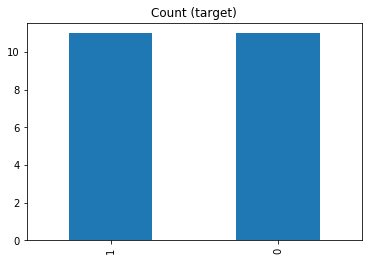

In [64]:
harris_data_class_0_under = harris_data_class_0.sample(count_class_1)
harris_data_test_under = pd.concat([harris_data_class_0_under, harris_data_class_1], axis=0)

print('Random under-sampling:')
print(harris_data_test_under['Chinese Restraunt Exist?'].value_counts())

harris_data_test_under['Chinese Restraunt Exist?'].value_counts().plot(kind='bar', title='Count (target)');

### Python imbalanced-learn module

In [65]:
import imblearn

c:\users\yang cao\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [66]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

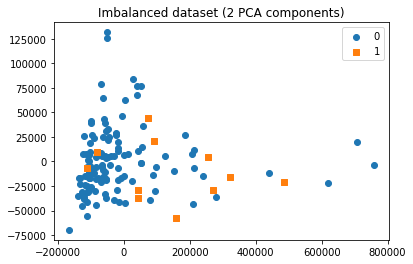

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

Removed indexes: [ 43  23  39 101  92  86 106  66  62 100 125   0  17  20  25  44  53  65
  70  73  75  93]


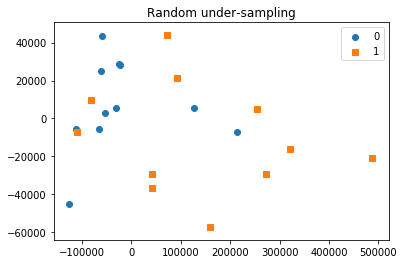

In [68]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')


109 new random picked points


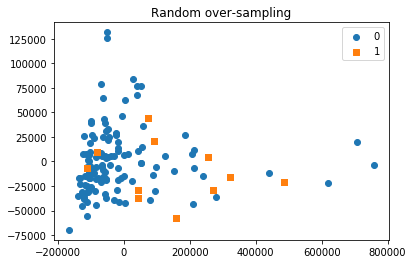

array([[ 4.22577643e+04, -3.68651752e+04],
       [ 7.99940926e+04, -3.90872827e+04],
       [ 5.26823049e+04, -1.93493955e+03],
       [ 7.57697412e+05, -3.47713795e+03],
       [ 2.39394472e+05, -1.49367275e+04],
       [ 2.11997268e+05,  1.20867650e+04],
       [ 2.07013896e+05,  7.40948631e+03],
       [ 5.58381787e+04,  1.49446766e+04],
       [-1.64694843e+05, -6.97644553e+04],
       [-1.09640835e+05, -2.49693651e+04],
       [-1.17134579e+05, -2.38343293e+04],
       [-1.08547577e+05, -2.98270214e+04],
       [-6.13548752e+04, -8.94362616e+03],
       [-9.88320777e+04,  4.08614382e+04],
       [-1.34498255e+05, -1.64359326e+04],
       [-1.03765876e+05,  1.18520067e+01],
       [ 1.51338135e+05, -9.23980165e+03],
       [ 3.21921507e+05, -1.62613524e+04],
       [-1.18192160e+05, -1.44019940e+04],
       [-1.04996401e+05, -1.66026833e+04],
       [-1.09896773e+05, -6.92486810e+03],
       [-8.22790595e+04, -5.29620556e+03],
       [ 7.06957005e+05,  2.03257269e+04],
       [ 2.

In [69]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')
X_ros

Removed indexes: [  0   1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  29  30  31  33  34  35  36  37  38
  39  40  41  42  44  45  46  47  48  49  50  51  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130]


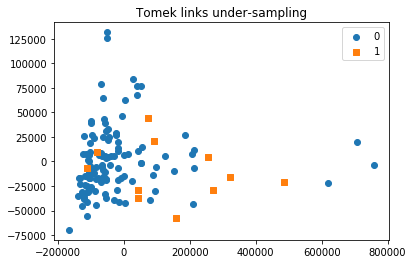

In [70]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

In [71]:
X_train_tl, X_test_tl, y_train_tl, y_test_tl = train_test_split(X_tl, y_tl, test_size=0.2, random_state=1)

model_tl = XGBClassifier()
model_tl.fit(X_train_tl, y_train_tl)
y_pred_tl = model_tl.predict(X_test_tl)

accuracy = accuracy_score(y_test_tl, y_pred_tl)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.00%


In [72]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=1)

model_ros = XGBClassifier()
model_ros.fit(X_train_ros, y_train_ros)
y_pred_ros = model_ros.predict(X_test_ros)

accuracy = accuracy_score(y_test_ros, y_pred_ros)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.67%


In [73]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.2, random_state=1)

model_rus = XGBClassifier()
model_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = model_rus.predict(X_test_rus)

accuracy = accuracy_score(y_test_rus, y_pred_rus)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 20.00%


### (5) model prediction.

In [74]:
ford_bend_data = pd.read_csv('fort-bend-County-Study-Data.csv')
ford_bend_data = ford_bend_data.drop(ford_bend_data.columns[0],axis=1)
ford_bend_data.head()

,Zip Code,Latitude,Longitude,Current Population,2010 Population,Households per ZIP Code,Average House Value,Avg. Income Per Household,Persons Per Household,White Population,...,Other Population,Male Population,Female Population,Median Age,Male Median Age,Female Median Age,# Residential Mailboxes,# Business Mailboxes,Total Delivery Receptacles,Number of Businesses
0,77053,29.589335,-95.464272,32388,28954,8133.0,85200.0,45953.0,3.56,10104,...,5950,14029,14925,29.5,27.9,31.1,9098.0,311.0,9371.0,184
1,77406,29.581700,-95.760900,53314,33682,10923.0,265700.0,114696.0,2.89,27011,...,1511,17791,15891,38.5,38.3,38.8,18448.0,618.0,19875.0,489
2,77407,29.667837,-95.722106,64732,28595,9074.0,216900.0,96947.0,3.15,12199,...,2476,13791,14804,31.1,30.6,31.5,20550.0,389.0,32700.0,391
3,77417,29.456180,-95.979182,1844,2457,858.0,107100.0,42219.0,2.86,1268,...,600,1194,1263,35.5,34.6,36.5,645.0,10.0,843.0,25
4,77441,29.681924,-95.920287,17250,4809,1743.0,411900.0,160162.0,2.76,4018,...,150,2387,2422,46.5,46.4,46.5,6250.0,151.0,7028.0,199


In [75]:
lat_ford_bend = 29.5693
lon_ford_bend = -95.8143

map_ford_bend = folium.Map(location=[lat_ford_bend, lon_ford_bend], zoom_start=10)

# add markers to map
for lat, lng, zip_code in zip(ford_bend_data['Latitude'], ford_bend_data['Longitude'], ford_bend_data['Zip Code']):
    label = 'zip-{}, Ford_bend, TX'.format(zip_code)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ford_bend)

map_ford_bend

In [76]:
ford_bend_venues = getNearbyVenues(names=ford_bend_data['Zip Code'],
                                   latitudes=ford_bend_data['Latitude'],
                                   longitudes=ford_bend_data['Longitude']
                                  )


77053
77406
77407
77417
77441
77444
77459
77461
77469
77471
77477
77478
77479
77489
77494
77498
77545


In [77]:
ford_bend_venues = ford_bend_venues.rename(index=str, columns={"Neighborhood": "Zip Code", "Neighborhood Latitude":"Latitude",
                                                        "Neighborhood Longitude": "Longitude"})
print(ford_bend_venues.shape)
ford_bend_venues.head()

(28, 7)


,Zip Code,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,77053,29.589335,-95.464272,La Michoacana,29.591196,-95.468783,Food
1,77406,29.581700,-95.760900,Sandy McGee's,29.582967,-95.761656,Café
2,77406,29.581700,-95.760900,Lonestar Saloon,29.583539,-95.761346,Bar
3,77406,29.581700,-95.760900,Blockhouse Coffee,29.581356,-95.763532,Coffee Shop
4,77406,29.581700,-95.760900,Joseph's Good Coffee & Fine Cigars,29.583437,-95.760328,Smoke Shop


In [78]:
# one hot encoding
ford_bend_onehot = pd.get_dummies(ford_bend_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ford_bend_onehot['Zip Code'] = ford_bend_venues['Zip Code'] 

# move neighborhood column to the first column
fixed_columns = [ford_bend_onehot.columns[-1]] + list(ford_bend_onehot.columns[:-1])
ford_bend_onehot = ford_bend_onehot[fixed_columns]

ford_bend_onehot.head()

,Zip Code,American Restaurant,Arts & Crafts Store,Auto Workshop,Bar,Baseball Field,Basketball Court,Café,Clothing Store,Coffee Shop,...,Hardware Store,Juice Bar,Paintball Field,Pizza Place,Plaza,Restaurant,Shoe Store,Skate Park,Smoke Shop,Spa
0,77053,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,77406,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,77406,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,77406,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,77406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


develop model using multiple attributes

In [79]:
labels = harris_data.columns[3:-1]
X = harris_data[labels]
y = harris_data['Chinese Restraunt Exist?']

In [80]:
rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)
print('Removed indexes:', id_rus)

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)
print(X_ros.shape[0] - X.shape[0], 'new random picked points')

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)
print('Removed indexes:', id_tl)

Removed indexes: [105  35 113  64  78  54  18 124  16 100  91   0  17  20  25  44  53  65
  70  73  75  93]
109 new random picked points
Removed indexes: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  29  30  31  32  33  34  35  36
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130]


In [81]:
X_train_tl, X_test_tl, y_train_tl, y_test_tl = train_test_split(X_tl, y_tl, test_size=0.2, random_state=1)

model_tl = XGBClassifier()
model_tl.fit(X_train_tl, y_train_tl)
y_pred_tl = model_tl.predict(X_test_tl)

accuracy = accuracy_score(y_test_tl, y_pred_tl)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=1)

model_ros = XGBClassifier()
model_ros.fit(X_train_ros, y_train_ros)
y_pred_ros = model_ros.predict(X_test_ros)

accuracy = accuracy_score(y_test_ros, y_pred_ros)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.2, random_state=1)

model_rus = XGBClassifier()
model_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = model_rus.predict(X_test_rus)

accuracy = accuracy_score(y_test_rus, y_pred_rus)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 84.62%
Accuracy: 93.75%
Accuracy: 20.00%


In [83]:
#take Ford Bend attributes.
labels = ford_bend_data.columns[3:]
X_ford_bend = ford_bend_data[labels]

#predict using models trained by oversampling (model_ros) & Tomek Links (model_tl)
y_ford_bend_pred_tl = model_tl.predict(X_ford_bend.values)
y_ford_bend_pred_ros = model_ros.predict(X_ford_bend.values)

print(y_ford_bend_pred_tl)
print(y_ford_bend_pred_ros)

location_ros = list(map(bool,y_ford_bend_pred_ros))
location_tl = list(map(bool,y_ford_bend_pred_tl))

ford_bend_data[location_ros]
ford_bend_data[location_tl]

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


,Zip Code,Latitude,Longitude,Current Population,2010 Population,Households per ZIP Code,Average House Value,Avg. Income Per Household,Persons Per Household,White Population,...,Other Population,Male Population,Female Population,Median Age,Male Median Age,Female Median Age,# Residential Mailboxes,# Business Mailboxes,Total Delivery Receptacles,Number of Businesses
11,77478,29.630216,-95.632308,25887,24739,9005.0,270200.0,91431.0,2.7,13735,...,770,12139,12600,44.3,43.2,45.1,9588.0,2017.0,13109.0,1939


### (6) result

In [ ]:
lat_ford_bend = 29.5693
lon_ford_bend = -95.8143

map_ford_bend = folium.Map(location=[lat_ford_bend, lon_ford_bend], zoom_start=10)

# add markers to map
for lat, lng, zip_code in zip(ford_bend_data['Latitude'], ford_bend_data['Longitude'], ford_bend_data['Zip Code']):
    label = 'zip-{}, Ford_bend, TX'.format(zip_code)
    label = folium.Popup(label, parse_html=True)
    colors ='blue'
    if(zip_code == 77478):
        colors ='red'
        
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colors,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ford_bend)

map_ford_bend

Zip 77478 in Ford Bend, TX should be selected. 